# Determinando o tipo espectral da estrela

Determinando o tipo espectral baseado nas propriedades físicas das estrelas como raio, temperatura, magnitude absoluta e cor

Dataset do Kaggle https://www.kaggle.com/deepu1109/star-dataset

* Importando bibliotecas

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

* Lendo arquivo CSV

In [2]:
dados = pd.read_csv('stars.csv')

* Exibindo cinco primeiras linhas

In [3]:
dados.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


In [4]:
labels = dados['Star type'].unique()

Criando gráfico do diagrama HR

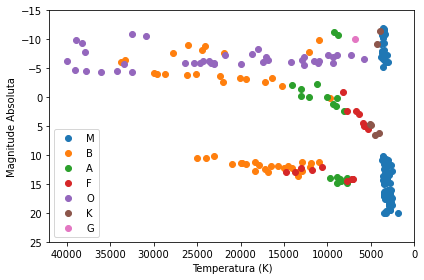

In [5]:
for x in dados['Spectral Class'].unique():
    tmp = dados[dados['Spectral Class']==x]
    plt.scatter(tmp['Temperature (K)'],tmp['Absolute magnitude(Mv)'],label=x);

plt.xlim([42000,0]);
plt.ylim([25,-15]);
plt.xlabel('Temperatura (K)');
plt.ylabel('Magnitude Absoluta');
plt.legend();
plt.tight_layout();

* Verificando a contagem de estrelas por tipo

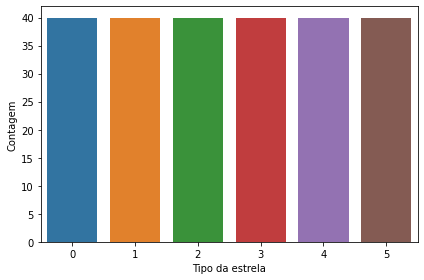

In [6]:
sns.countplot(dados['Star type']);
plt.xlabel('Tipo da estrela');
plt.ylabel('Contagem');
plt.tight_layout();

* Determinando a contagem de estrelas por cor

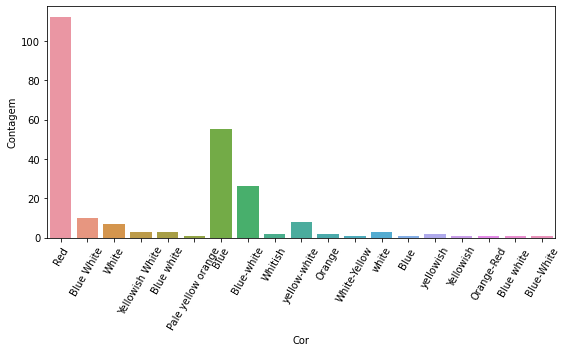

In [7]:
plt.figure(figsize=(8,5))
sns.countplot(dados['Star color']);
plt.xticks(rotation=60);
plt.xlabel('Cor');
plt.ylabel('Contagem');
plt.tight_layout()

* Verificando a distribuição de temperatura

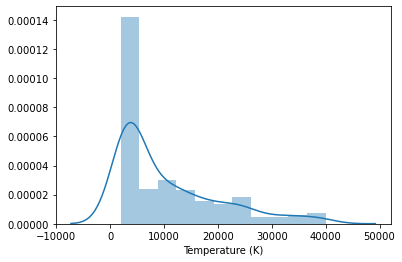

In [8]:
sns.distplot(dados['Temperature (K)'])

* Verificando a distribuição dos raios

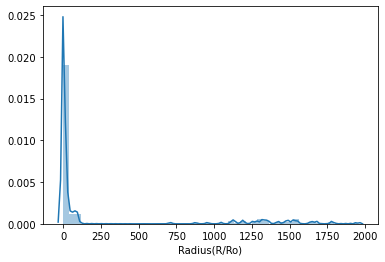

In [9]:
sns.distplot(dados['Radius(R/Ro)'])

* Verificando a distribuição da luminosidade

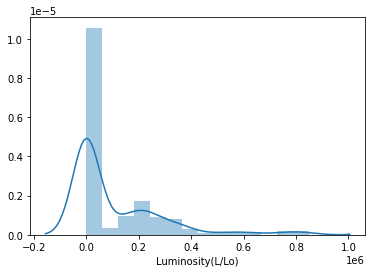

In [10]:
sns.distplot(dados['Luminosity(L/Lo)'])

* Convertendo variáveis categóricas Star Color e Spectral Class para numéricas

In [11]:
dados = pd.get_dummies(dados, columns=["Star color","Spectral Class"], prefix=["Star color is","Spectral Class is"])

In [12]:
dados.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color is_Blue,Star color is_Blue,Star color is_Blue White,Star color is_Blue white,Star color is_Blue white,...,Star color is_white,Star color is_yellow-white,Star color is_yellowish,Spectral Class is_A,Spectral Class is_B,Spectral Class is_F,Spectral Class is_G,Spectral Class is_K,Spectral Class is_M,Spectral Class is_O
0,3068,0.002400,0.1700,16.12,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,3042,0.000500,0.1542,16.60,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2600,0.000300,0.1020,18.70,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,2800,0.000200,0.1600,16.65,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1939,0.000138,0.1030,20.06,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


* Determinando variáveis X e Y

In [13]:
X = dados.drop(['Star type'],axis=1).values
Y = dados['Star type'].values

* Criando amostras de treino e teste

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size=0.2, random_state=42)

* Importando métricas de classificação

In [16]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, confusion_matrix

* Utilizando modelo de regressão logística

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
logreg = LogisticRegression()

In [19]:
logreg.fit(X_treino,Y_treino)

/Users/danilo/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
Y_pred_logreg = logreg.predict(X_teste)

In [21]:
cm_logreg = confusion_matrix(Y_teste,Y_pred_logreg)

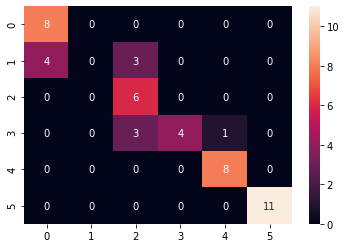

In [22]:
sns.heatmap(cm_logreg, annot=True, fmt='g', xticklabels=labels, yticklabels=labels)

In [23]:
acc_logreg = accuracy_score(Y_teste,Y_pred_logreg)
precision_logreg = precision_score(Y_teste,Y_pred_logreg,average='macro')
recall_logreg = recall_score(Y_teste,Y_pred_logreg,average='macro')
f1_logreg = f1_score(Y_teste,Y_pred_logreg,average='macro')

/Users/danilo/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
print("Acuracia = {:0.2f}%".format(acc_logreg*100))
print("Precisão = {:0.2f}%".format(precision_logreg*100))
print("Recall = {:0.2f}%".format(recall_logreg*100))
print("F1 = {:0.2f}%".format(f1_logreg*100))

Acuracia = 77.08%
Precisão = 67.59%
Recall = 75.00%
F1 = 67.91%


* Utilizando modelo Support Vector Machine

In [25]:
from sklearn.svm import SVC

In [26]:
svm = SVC()

In [27]:
svm.fit(X_treino,Y_treino)

SVC()

In [28]:
Y_pred_svm = svm.predict(X_teste)

In [29]:
cm_svm = confusion_matrix(Y_teste,Y_pred_svm)

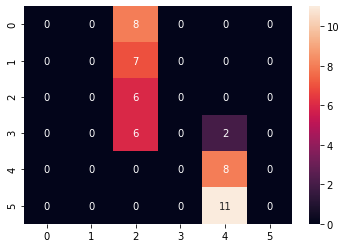

In [30]:
sns.heatmap(cm_svm, annot=True, fmt='g', xticklabels=labels, yticklabels=labels)

In [31]:
acc_svm = accuracy_score(Y_teste,Y_pred_svm)
precision_svm = precision_score(Y_teste,Y_pred_svm,average='macro')
recall_svm = recall_score(Y_teste,Y_pred_svm,average='macro')
f1_svm = f1_score(Y_teste,Y_pred_svm,average='macro')

/Users/danilo/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
print("Acuracia = {:0.2f}%".format(acc_svm*100))
print("Precisão = {:0.2f}%".format(precision_svm*100))
print("Recall = {:0.2f}%".format(recall_svm*100))
print("F1 = {:0.2f}%".format(f1_svm*100))

Acuracia = 29.17%
Precisão = 10.05%
Recall = 33.33%
F1 = 15.26%


* Utilizando modelo de árvore de decisão

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
dtc = DecisionTreeClassifier()

In [35]:
dtc.fit(X_treino,Y_treino)

DecisionTreeClassifier()

In [36]:
Y_pred_dtc = dtc.predict(X_teste)

In [37]:
cm_dtc = confusion_matrix(Y_teste,Y_pred_dtc)

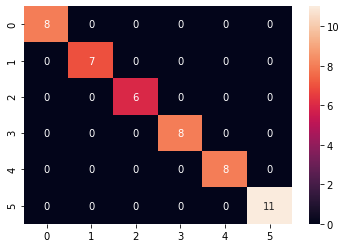

In [38]:
sns.heatmap(cm_dtc, annot=True, fmt='g', xticklabels=labels, yticklabels=labels)

In [39]:
acc_dtc = accuracy_score(Y_teste,Y_pred_dtc)
precision_dtc = precision_score(Y_teste,Y_pred_dtc,average='macro')
recall_dtc = recall_score(Y_teste,Y_pred_dtc,average='macro')
f1_dtc = f1_score(Y_teste,Y_pred_dtc,average='macro')

In [40]:
print("Acuracia = {:0.2f}%".format(acc_dtc*100))
print("Precisão = {:0.2f}%".format(precision_dtc*100))
print("Recall = {:0.2f}%".format(recall_dtc*100))
print("F1 = {:0.2f}%".format(f1_dtc*100))

Acuracia = 100.00%
Precisão = 100.00%
Recall = 100.00%
F1 = 100.00%


* Modelo Random Forest Classifier

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
rfc = RandomForestClassifier()

In [43]:
rfc.fit(X_treino,Y_treino)

RandomForestClassifier()

In [44]:
Y_pred_rfc = rfc.predict(X_teste)

In [45]:
cm_rfc = confusion_matrix(Y_teste, Y_pred_rfc)

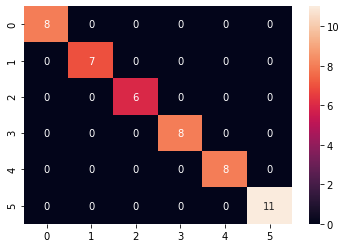

In [46]:
sns.heatmap(cm_rfc, annot=True, fmt='g', xticklabels=labels, yticklabels=labels)

In [47]:
acc_rfc = accuracy_score(Y_teste,Y_pred_rfc)
precision_rfc = precision_score(Y_teste,Y_pred_rfc,average='macro')
recall_rfc = recall_score(Y_teste,Y_pred_rfc,average='macro')
f1_rfc = f1_score(Y_teste,Y_pred_rfc,average='macro')

In [48]:
print("Acuracia = {:0.2f}%".format(acc_rfc*100))
print("Precisão = {:0.2f}%".format(precision_rfc*100))
print("Recall = {:0.2f}%".format(recall_rfc*100))
print("F1 = {:0.2f}%".format(f1_rfc*100))

Acuracia = 100.00%
Precisão = 100.00%
Recall = 100.00%
F1 = 100.00%


* Modelos Decision Tree e Random Forest foram capazes de classificar todas as estrelas corretamente